In [2]:
import os

base_dir = './rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-020.png', 'rock06ck02-115.png', 'rock01-066.png', 'rock03-073.png', 'rock03-111.png', 'rock07-k03-013.png', 'rock06ck02-039.png', 'rock04-110.png', 'rock04-050.png', 'rock06ck02-105.png']
['paper02-072.png', 'paper01-114.png', 'paper06-013.png', 'paper02-089.png', 'paper04-042.png', 'paper01-029.png', 'paper04-018.png', 'paper01-000.png', 'paper05-076.png', 'paper04-068.png']
['scissors03-020.png', 'scissors02-029.png', 'scissors02-048.png', 'scissors01-028.png', 'scissors01-083.png', 'scissors01-040.png', 'scissors02-016.png', 'scissors04-002.png', 'testscissors02-005.png', 'scissors02-077.png']


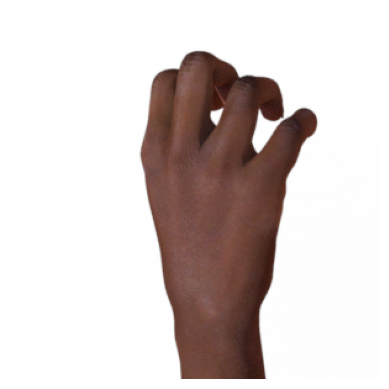

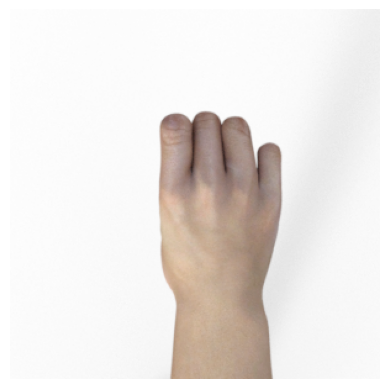

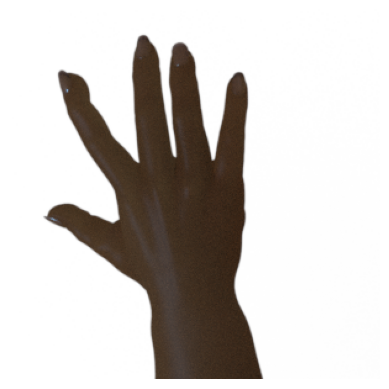

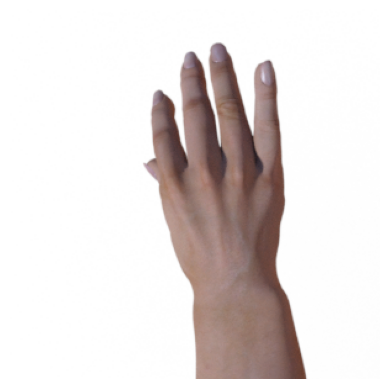

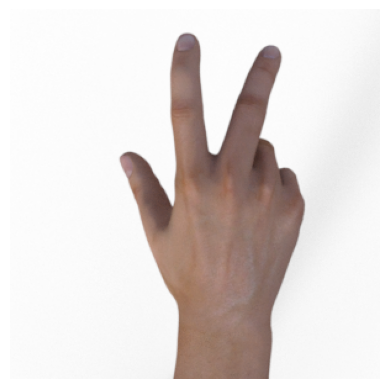

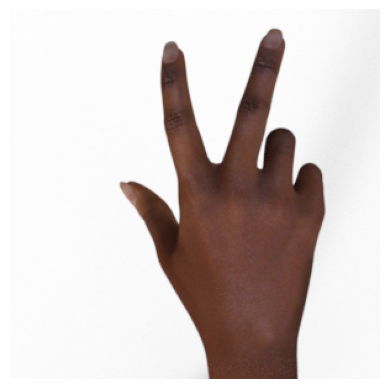

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 17s 832ms/step - loss: 1.1490 - accuracy: 0.3655 - val_loss: 1.0843 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 15s 749ms/step - loss: 1.0815 - accuracy: 0.3897 - val_loss: 1.0923 - val_accuracy: 0.5376
Epoch 3/25
20/20 [==============================] - 16s 817ms/step - loss: 1.0944 - accuracy: 0.4274 - val_loss: 0.8821 - val_accuracy: 0.6371
Epoch 4/25
20/20 [==============================] - 16s 788ms/step - loss: 0.9389 - accuracy: 0.5135 - val_loss: 0.5772 - val_accuracy: 0.6478
Epoch 5/25
20/20 [==============================] - 17s 837ms/step - loss: 0.9259 - accuracy: 0.5365 - val_loss: 0.5243 - val_accuracy: 0.6774
Epoch 6/25
20/20 [==============================] - 17s 829ms/step - loss: 0.7768 - accuracy: 0.6230 - val_loss: 0.4485 - val_accuracy: 0.8199
Epoch 7/25
20/20 [==============================] - 16s 817ms/step - loss: 0.7053 - accuracy: 0.6786 - val_loss: 0.2745 - val_accuracy: 0.9140

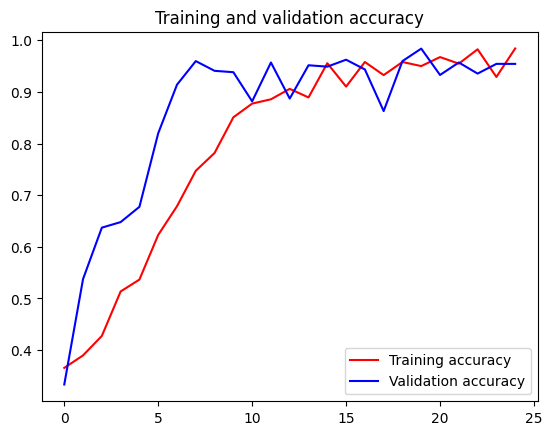

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()